---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# ***Churn Prediction***
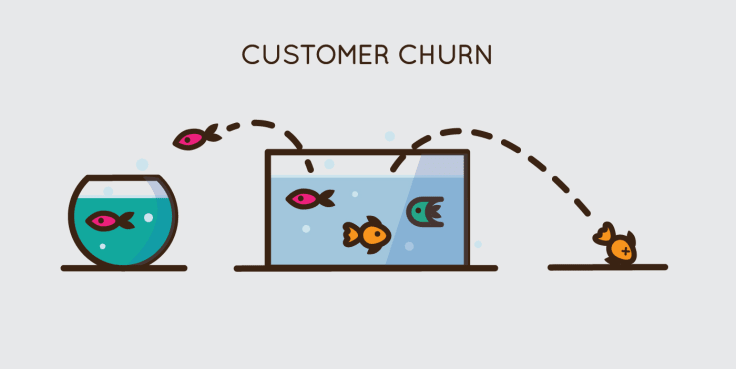


Ainda que o tema tenha ganhado mais notoriedade por conta da crescente oferta de serviços por assinatura (capitaneado pelo *streaming* de áudio e vídeo), o fato é que o *churn rate*, ou simplesmente taxa de rotatividade de clientes, sempre foi um assunto amplamente discutido e estudado no mundo empresarial.

Como o tema está atrelado à quantidade de clientes ativos, ou à possibilidade deles deixarem de ser, uma alta taxa de rotatividade representa queda ou baixo fluxo de receita - e é nesse ponto que a análise de *churn prediction* entra, abastecendo as mais diversas áreas sobre a probabilidade de um cliente deixar ou não a base de assinantes.

O objetivo final da predição é indicar quais clientes estão mais propensos a cancelar um serviço em específico, habilitando times comerciais e de marketing a pensarem e oferecerem descontos e/ou novos serviços com intuíto de retê-los.

Duas métricas importantes que devemos ter em mente, quando falamos de *churn*, é o **CAC** e o **LTV**:
*   **Custo de aquisição de clientes (CAC):** valor que a empresa precisa investir para adquirir um novo cliente - sendo que geralmente o custo de aquisição é mais alto do que o custo de retenção.

*   ***Life time value* (LTV):** o valor que cada cliente gera para a empresa.


# **Objetivo do projeto**
* Classificar a propensão de um cliente deixar a base de assinantes (base genérica) por meio de informações socioeconômicas e de relacionamento (serviços contratados) com a empresa.

# **Abordagem do projeto**

Para esse projeto utilizarei do *framework* para *machine learning* desenvolvido pela Google:

1.   Acquisição dos dados
2.   Exploração dos dados
3.   Preparação dos dados
4.   Escolha do modelo
5.   Construção do modelo
6.   Otimização do modelo
7.   Conclusão


## **1- Aquisição dos dados**

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema típico de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).


In [ ]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Importar pacotes dos modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# importar os dados
DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

# ver as 5 primeiras entradas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##**Estrutura do *dataset*** 
*   21 colunas (variáveis)
*   7.043 linhas (observações)

##**Variáveis / *Data type*** 
* 2 int64 (valores sem casas decimais)
* 1 float64 (valores com casas decimais)
* 18 objetos

In [ ]:
# nº total de entradas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# **Dicionário de dados**
*   **Customer ID:** Código do cliente (gerado pela operadora)
*   **Gender:** Sexo do cliente
*   **Senior citizen:** Se o cliente é idoso (binário)
*   **Partner:** Se o cliente possui conjugê (dummy)
*   **Dependents:** Se o cliente possui dependentes/filhos (dummy)
*   **Tenure:** Número de meses desde que se tornou cliente
*   **Phone service:** Se o cliente possui serviço de telefone (dummy)
*   **Multiple lines:** Se o cliente possui multiplas linhas (no / yes / no phone service)
*   **Internet service:** Se o cliente possui serviço de internet (dummy)
*   **Online security:** Se o cliente serviço de proteção / anti-vírus
*   **Online backup:** Se o cliente serviço de backup online / núvem
*   **Device protection:** Se o cliente serviço / seguro para os equipamentos (por exemplo, mal uso)
*   **Tech support:** Se o cliente suporte técnico
*   **Streaming TV:** Se o cliente possui serviço de streaming na TV
*   **Streaming movies:** Se o cliente possui serviço a la carte de filmes
*   **Contract:** Formato de contrato, se mensal / anual etc
*   **Paper less billing:** Se o cliente recebe a conta via email ou outro formato que não papel
*   **Payment method:** Formato de pagamento
*   **Monthly charges:** Valor de pagamento mensal
*   **Total charges:** Total pago pelo cliente desde o início da assinatura
*   **Churn:** Variável alvo. Se o cliente se manteve ou não na base de assinantes.


**Variável alvo**: Churn (dummy value - Yes ou No). No caso específico, observações 'Yes' apontam para clientes que deixaram a base de assinantes, enquanto o 'No', para os clientes que permaneceram na base.



## **2- Exploração dos dados**

## **Hipóteses a serem exploradas:**
Dados sociais/demográficos podem influenciar no *churn*?
*   O sexo influência na taxa de *churn*?
*   A idade (senioridade) impacta de forma positiva ou negativa na taxa de *churn*?
*   Existe diferença no número de *churn* entre casais com e sem filhos?

Clientes com maior tempo de serviço estão mais ou menos sujeitos à desistência?

Clientes que adotaram formatos mais sustentáveis de cobrança estão mais ou menos sujeitos à desistência?

Clientes com valores de pagamento mais altos estão mais ou menos sujeitos à desistência?

A periodicidade de pagamento é um indicador relevante de *churn*?



In [ ]:
# resumo estatístico do DF - tenure
print(df.tenure.describe()) #tenure é o número de meses desde entrada do cliente

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


O alto valor de desvio padrão pode indicar um possível *outlier* que será investigado com maior profundidade no decorrer da análise.

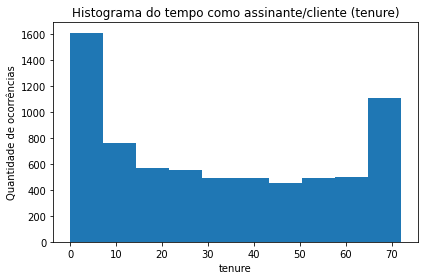

In [ ]:
# Plot gráfico histograma - variável 'tenure'
fig, ax = plt.subplots()

ax.hist('tenure', data=df)
ax.set_title("Histograma do tempo como assinante/cliente (tenure)")
ax.set_ylabel("Quantidade de ocorrências")
ax.set_xlabel("tenure")

plt.tight_layout()

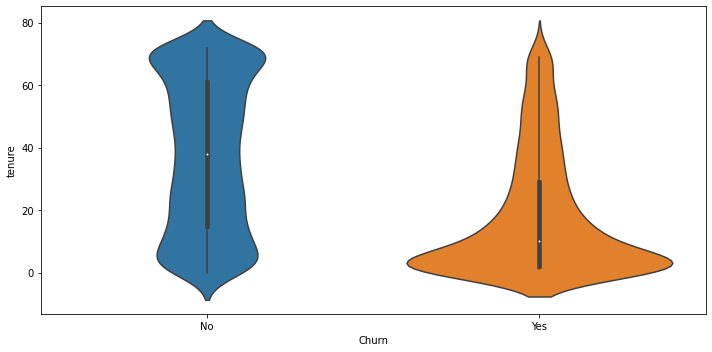

In [ ]:
# Plot gráfico violino - variável 'Churn' VS 'Tenure'

fig, ax = plt.subplots(figsize=(10,5))

sns.violinplot(data=df, x='Churn', y='tenure', ax=ax);

plt.tight_layout()

A suspeita de *outliers* de fato se confirma - seriam os clientes com mais de 70 meses de assinatura. Ao mesmo tempo, como a frequência é baixa, não irei tratá-los em um primeiro momento.

**Obs**: a largura do gráfico de violino indica um maior ou menor número de clientes - sendo esse um diferencial em comparação com o *box-splot*, que só disponibiliza a distribuição, mas não frequência.

**Insights:**
*   O volume de *churn* é considerávelmente maior entre usuários com menor tempo de assinatura. Isso pode ser observado pela base mais larga no gráfico laranja ('Yes') e comparando as medianas (assim como os percentis): ***Yes* aprox. 10 meses** | ***No* aprox. 38 meses**
*   Usuários com até 25 meses de assinatura (limite superior do terceiro quartil - *'Yes'*) possuem maior frequência de *churn* e por isso necessitam de maior atenção.

In [ ]:
# resumo estatístico do DF - monthly charges
print(df.MonthlyCharges.describe()) #Monthly Charges é o valor de pagamento mensal

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64


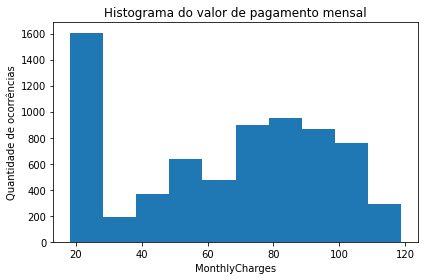

In [ ]:
# Plot gráfico histograma - variável 'monthly charges'
fig, ax = plt.subplots()

ax.hist('MonthlyCharges', data=df)
ax.set_title("Histograma do valor de pagamento mensal")
ax.set_ylabel("Quantidade de ocorrências")
ax.set_xlabel("MonthlyCharges")

plt.tight_layout()

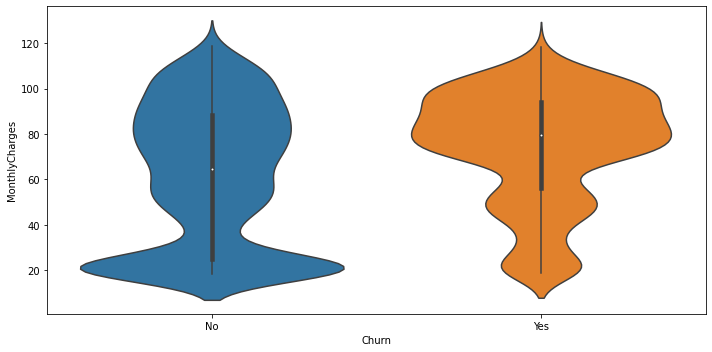

In [ ]:
# Plot gráfico violino - variável 'Churn' X 'Monthly Charges'

fig, ax = plt.subplots(figsize=(10,5))

sns.violinplot(data=df, x='Churn', y='MonthlyCharges', ax=ax);

plt.tight_layout()

**insights:**
*   O volume de *churn* é considerávelmente maior entre clientes com maior valor mensal de pagamento.
*   Com base na amostra obtida, clientes com menor valor mensal de pagamento são maioria (recorte *'No'*).

Considerando que a variável 'TotalCharges' é uma varíavel númerica mas está como objeto no *dataframe*, irei transformá-la em float64. Isso aconteceu pelo fato de constarem alguns valores ausentes (espaço em branco).

In [ ]:
# Substituição dos valores ausentes
df["TotalCharges"]= df.TotalCharges.replace(r'^\s*$', np.nan, regex=True)

# Alteração da classe de dados de objeto para float
df["TotalCharges"] = df.TotalCharges.astype(float)

# Substituir valores ausentes pela mediana
TotalChargesMedian = df.TotalCharges.median()
df["TotalCharges"].fillna(TotalChargesMedian, inplace=True)

# Confirmação da alteração
df[["TotalCharges"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TotalCharges  7043 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


In [ ]:
# resumo estatístico do DF - total charges
print(df.TotalCharges.describe())

count    7043.000000
mean     2281.916928
std      2265.270398
min        18.800000
25%       402.225000
50%      1397.475000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64


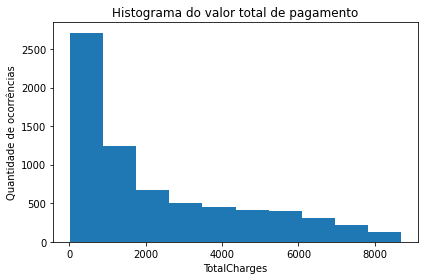

In [ ]:
# Plot gráfico histograma - variável 'total charges'
fig, ax = plt.subplots()

ax.hist('TotalCharges', data=df)
ax.set_title("Histograma do valor total de pagamento")
ax.set_ylabel("Quantidade de ocorrências")
ax.set_xlabel("TotalCharges")

plt.tight_layout()

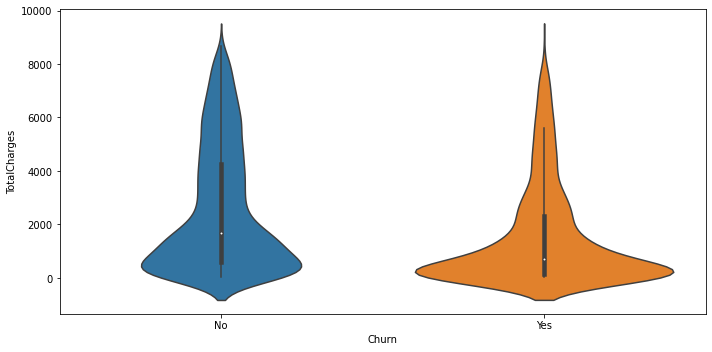

In [ ]:
# Plot gráfico violino - variável 'Churn' X 'Total Charges'

fig, ax = plt.subplots(figsize=(10,5))

sns.violinplot(data=df, x='Churn', y='TotalCharges', ax=ax);

plt.tight_layout()

**Insights:**
*   Analisando o histograma é possível identificar que a maior frequência de ocorrências acontece com valores totais até 2.000, ou seja, temos duas opções: 
1.   Base composta por clientes com pouco tempo de contrato, o que impactaria em um volume menor de cobranças totais.
2.   Base composta por clientes com baixo valor agregado.

*   A distribuição e frequência entre classes (*churn*) é parecida, o que chama a atenção é a mediana, onde os clientes que deixaram a base de assinantes, tiveram um volume total de cobrança menor - o que pode indicar um descontentamento com o serviço, deixando a base de assinantes mais cedo.

Churn
No     0.73463
Yes    0.26537
Name: customerID, dtype: float64
Churn
No     5174
Yes    1869
Name: customerID, dtype: int64


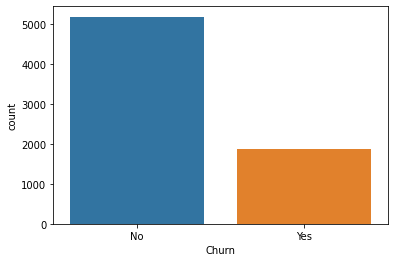

In [ ]:
# Checagem da proporção entre usuários que deixaram a base e os que continuam clientes - Variável 'Churn'

print((df.groupby(['Churn']).customerID.count()/df.shape[0]))
print(df.groupby(['Churn']).customerID.count())

sns.countplot(x ='Churn', data = df,)
 
plt.show()

Temos uma boa proporção entre classes, ainda assim balancearemos o *dataset* quando formos aplicar as técnicas de *machine learning*.
1.   **Churn:** 26,5% (1869)
2.   **Não churn:** 73.5% (5174)



# **Hipótese 1**
Dados sociais/demográficos podem influenciar no churn?

In [ ]:
print((df.groupby(['Churn','gender']).customerID.count()/df.groupby(['gender',]).customerID.count()))

Churn  gender
No     Female    0.730791
       Male      0.738397
Yes    Female    0.269209
       Male      0.261603
Name: customerID, dtype: float64


Em uma primeira análise, a proporção entre homens e mulheres dentro de cada classe é muito parecida. Possívelmente indicando que o sexo não é um fator determinante para se calcular a probabilidade de *churn*.

In [ ]:
print((df.groupby(['SeniorCitizen','Churn']).customerID.count()/df.groupby(['SeniorCitizen',]).customerID.count()))

SeniorCitizen  Churn
0              No       0.763938
               Yes      0.236062
1              No       0.583187
               Yes      0.416813
Name: customerID, dtype: float64


Proporcionalmente, a taxa de evasão é maior entre idosos do que entre não idosos. Enquanto a proporção de *churn* entre não idosos é de 23.6%, entre idosos é de 41.7%.

In [ ]:
print((df.groupby(['Dependents','Churn']).customerID.count()/df.groupby(['Dependents',]).customerID.count()))

Dependents  Churn
No          No       0.687209
            Yes      0.312791
Yes         No       0.845498
            Yes      0.154502
Name: customerID, dtype: float64


Clientes sem dependentes apresentam uma maior proporção de *churn*. Enquanto a proporção de *churn* entre clientes sem dependentes é de 31.3%, entre clientes com dependentes é de 15.4% 

# **Hipótese 2**
Clientes com maior tempo de serviços estão mais ou menos sujeitos à desistência?

In [ ]:
print("Churn = Yes",df.tenure[df['Churn'] == 'Yes'].describe())
print()
print("Churn = No",df.tenure[df['Churn'] == 'No'].describe())

Churn = Yes count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: tenure, dtype: float64

Churn = No count    5174.000000
mean       37.569965
std        24.113777
min         0.000000
25%        15.000000
50%        38.000000
75%        61.000000
max        72.000000
Name: tenure, dtype: float64


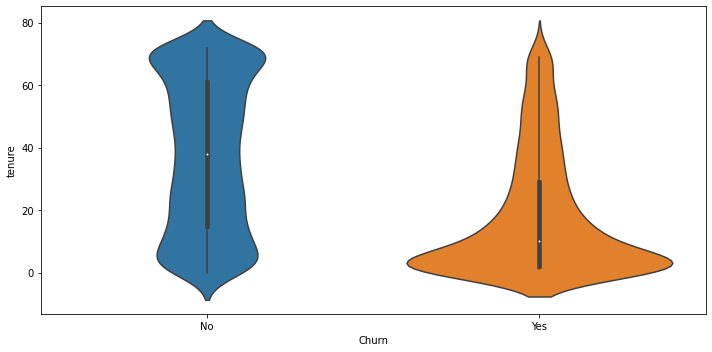

In [ ]:
# Plot gráfico violino - variável 'Churn' VS 'Tenure'

fig, ax = plt.subplots(figsize=(10,5))

sns.violinplot(data=df, x='Churn', y='tenure', ax=ax);

plt.tight_layout()

No ínicio da análise utilizei do gráfico de violino para buscar por possíveis outliers, mas ele também pode nos ajudar a explorar essa hipótese. Podemos olhar por dois ângulos:

1.   **Distribuição dos clientes da classe 'Yes':** A ampla maioria do clientes que deixaram a base de assinantes, a fez ainda dentro do primeiro ano (mediana aprox. de 18 meses). Ou seja, podemos interpretar que quanto mais novo como cliente, maior a chance dele deixar o serviço.

2.   **Comparando os quartis entre classes:**
*   Mediana: *'No'* 38 meses | *'Yes'* 18 meses
*   Terceiro quartil: *'No'* 61 meses | *'Yes'* 29 meses.

Ou seja, o tempo de contrato com a empresa é sim um fator a ser considerado na probabilidade de um cliente deixar ou não a base de assinantes.

# **Hipótese 3**
Clientes que adotaram formatos mais sustentáveis de cobrança estão mais ou menos sujeitos à desistência?

**Definição de sustentável:** não utilização de papel

In [ ]:
print((df.groupby(['PaymentMethod','Churn']).customerID.count()/df.groupby(['PaymentMethod',]).customerID.count()))

PaymentMethod              Churn
Bank transfer (automatic)  No       0.832902
                           Yes      0.167098
Credit card (automatic)    No       0.847569
                           Yes      0.152431
Electronic check           No       0.547146
                           Yes      0.452854
Mailed check               No       0.808933
                           Yes      0.191067
Name: customerID, dtype: float64


1.   Clientes com cobrança automática (*Bank* ou *credit card*) possuem menor proporção de evasão.
2.   Clientes que ainda recebem a fatura física (*mailed check*) possuem uma taxa de evasão ligeiramente maior (3ª maior) em comparação com *bank* e *credit card*.
3.   Clientes que recebem a fatura por e-mail (*Electronic check*) possuem a maior taxa de evasão, sendo que quase 50% dos clientes deixaram de ser assinar os serviços.

# **Hipótese 4**
Clientes com valores de pagamentos mais altos estão mais ou menos sujeitos à desistência?

In [ ]:
print("Churn = Yes",df.MonthlyCharges[df['Churn'] == 'Yes'].describe())
print()
print("Churn = No",df.MonthlyCharges[df['Churn'] == 'No'].describe())

Churn = Yes count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: MonthlyCharges, dtype: float64

Churn = No count    5174.000000
mean       61.265124
std        31.092648
min        18.250000
25%        25.100000
50%        64.425000
75%        88.400000
max       118.750000
Name: MonthlyCharges, dtype: float64


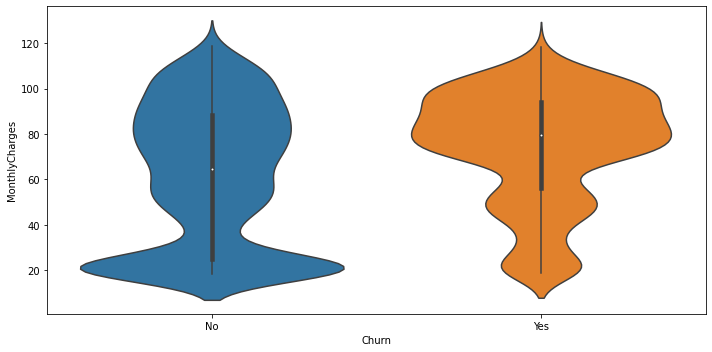

In [ ]:
# Plot gráfico violino - variável 'Churn' X 'Monthly Charges'

fig, ax = plt.subplots(figsize=(10,5))

sns.violinplot(data=df, x='Churn', y='MonthlyCharges', ax=ax);

plt.tight_layout()

Ao compararmos a distribuição entre classes, é possível observar que a maior frequência de desistência aconteceu a partir do segundo quartil, ou seja, clientes com faturas maiores são mais propensos a desistir dentro do universo estudado.
A diferença entre medianas também serve como indicador, enquanto a base de clientes possui uma mediana de 61, a base de *churn* aponta na casa de 74.

# **Hipótese 5**
A periodicidade de pagamento é um indicador relevante de *churn*?

In [ ]:
print((df.groupby(['Contract','Churn']).customerID.count()/df.groupby(['Contract',]).customerID.count()))

Contract        Churn
Month-to-month  No       0.572903
                Yes      0.427097
One year        No       0.887305
                Yes      0.112695
Two year        No       0.971681
                Yes      0.028319
Name: customerID, dtype: float64


Quanto menor a frequência de pagamento, por exemplo planos anuais, menor a chance do cliente deixar a base de assinantes. Abaixo as respectivas proporções:
1.   Mês a mês: 42.7% de desistência
2.   Um ano: 11.3% de desistência
3.   Dois anos: 2.8% de desistência



# **Resumo das hipóteses:**

1.   O sexo biológico do cliente **NÃO** parace ser relevante para o cálculo de *churn*
2.   Idosos apontam uma **MAIOR** probabilidade de *churn*
3.   Clientes sem dependentes apresentaram uma **MAIOR** probabilidade de *churn*
4.   Quanto maior o tempo como assinante, **MENOR** a probabilidade de *churn*
5.   Clientes com cobrança automática (bank ou credit cart), possuem **MENOR** probabilidade de *churn*. Enquanto clientes que recebem a fatura por e-mail, possuem a **MAIOR** taxa de churn.
6.   Quanto maior o valor mensal do serviço, **MAIOR** a probabilide de *churn*
7.   Quanto maior o tempo de contrato, **MENOR** a probabilide de *churn*



# **3- Preparação dos dados**
1.   Excluír variável 'customerID'
2.   As features que continham 2 labels únicos, serão processadas usando-se o `LabelEncoder`. Vale lembrar que isso inclui a variável alvo `Churn`. Na sequência, serão separadas as variáveis numéricas das categóricas. As categóricas serão transformadas em variáveis dummy, para permitir a sua utilização em todos os modelos.
3.   Balancear o conjunto de dados (*under sampling - preservando a classe minoritária)*
4.   Dividir o conjunto de dados entre treino e validação  



In [ ]:
# excluír varíavel 'customerID'
df_new = df.drop('customerID',axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# pré processar as variáveis
binary_var = df_new.nunique()[df_new.nunique() == 2].keys().tolist()
num_var = [col for col in df_new.select_dtypes(['int', 'float']).columns.tolist() if col not in binary_var]
cat_var = [col for col in df_new.columns.tolist() if col not in binary_var + num_var]

# criar uma cópia do dataframe
df_proc = df_new.copy()

# Label Encoding para as variáveis Binárias
le = LabelEncoder()
for i in binary_var:
    df_proc[i] = le.fit_transform(df_proc[i])

# Encoding para colunas categóricas com múltiplas classes
df_proc = pd.get_dummies(df_proc, columns=cat_var)

# ver as 5 primeiras entradas do novo dataframe
df_proc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


In [ ]:
# separação do dataset entre treino e validação
X = df_proc.drop('Churn', axis=1)
y = df_proc['Churn']

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

0    1407
1    1407
Name: Churn, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


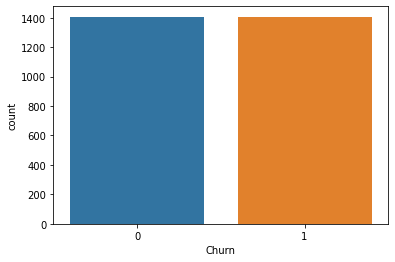

In [ ]:
# balanceamento do conjunto de dados
from imblearn.under_sampling import RandomUnderSampler;

# usar técnica under-sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train);

# ver o balanceamento das classes
print(pd.Series(y_rus).value_counts());

# plotar a nova distribuição de classes
sns.countplot(y_rus);

# **4- Escolha/construção do modelo**

No atual caso de estudo, utilizarei da métrica *recall*, uma vez que prioriza a indicação do maior número possível de casos (em outras palavras, possibilidade de evasão). Lembrando que o custo de manutenção tende a ser menor do que de aquisição, por tanto, é preferível trabalhar com ações preventivas do que buscar novos clientes no mercado.

### *Recall*

$$
\frac{TP}{TP+FN}
$$


# **Modelos de *Machine learning***

1- Regressão logística

In [ ]:
# definição do modelo
model = LogisticRegression()

# fit do modelo
model.fit(X_rus, y_rus) # lembrar de selecionar o dataset balanceado

# fazer previsões em cima de novos dados
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


2- Decision tree

In [ ]:
model2 = DecisionTreeClassifier(max_depth=4, criterion="entropy")

# 4. Fit do modelo (treinar)
model2.fit(X_rus, y_rus)

# 5. Fazer previsões em cima de novos dados
y_pred2 = model2.predict(X_test)

3- XGBoost

In [ ]:
# instanciar modelo
model3 = XGBClassifier(
    #learning_rate=0.05,
    #n_estimators=100,
    max_depth=4,
    #subsample=0.9,
    #colsample_bytree=0.1,
    #gamma=1,
    #random_state=42    
)

# fit do modelo (treinar)
model3.fit(X_rus, y_rus)

# fazer previsões em cima de novos dados
y_pred3 = model3.predict(X_test)

# **Avaliação dos modelos**

Lembrando que utilizaremos do *Recall* para avaliar a performance dos algoritmos.

### *Recall*

$$
\frac{TP}{TP+FN}
$$

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
print("\nRecall score:")
print("\nRegressão Logística:")
print(recall_score(y_test, y_pred))
print("\nRandom Forest:")
print(recall_score(y_test, y_pred2))
print("\nXGBoost:")
print(recall_score(y_test, y_pred3))


Recall score:

Regressão Logística:
0.7640692640692641

Random Forest:
0.7251082251082251

XGBoost:
0.7575757575757576


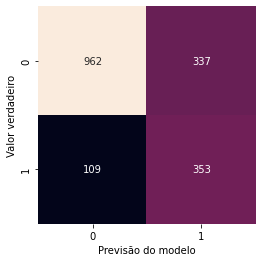

In [ ]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat, square=True, annot=True, cbar=False, fmt='g')
plt.xlabel('Previsão do modelo')
plt.ylabel('Valor verdadeiro');

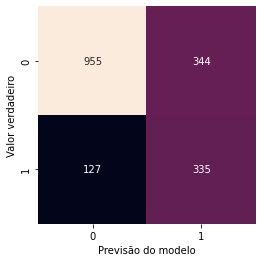

In [ ]:
mat = confusion_matrix(y_test, y_pred2)
sns.heatmap(mat, square=True, annot=True, cbar=False, fmt='g')
plt.xlabel('Previsão do modelo')
plt.ylabel('Valor verdadeiro');

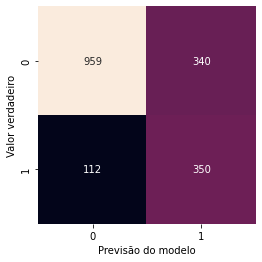

In [ ]:
mat = confusion_matrix(y_test, y_pred3)
sns.heatmap(mat, square=True, annot=True, cbar=False, fmt='g')
plt.xlabel('Previsão do modelo')
plt.ylabel('Valor verdadeiro');

Como o ***Regressão logística*** foi o modelo com melhor resultado (*Recall*), seguiremos com a otimização dele.

Regressão Logística:
0.7640692640692641

# **5- Otimização do modelo**
Utilizarei do *Grid Search* como técnica de otimização dos hyper-parâmetros, indicando assim os melhores parâmetros para o modelo de *churn* (regressão logística).

O *Grid search* basicamente testa diferentes combinações, retornando a melhor formação possível.

In [ ]:
# importando a biblioteca
from sklearn.model_selection import GridSearchCV

In [ ]:
# executando a busca por hiper-parâmetros (model = regressão logística)
parameters = {
    'C': [0.001,0.01,0.1,1,10,100,1000],
    }

clf = GridSearchCV(model, parameters)
clf.fit(X_rus, y_rus)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [ ]:
# ver melhor parâmetro
print(clf.best_params_)

{'C': 10}


Após a aplicação do *Grid search* obtivemos uma melhora marginal da performance do nosso modelo de 0.7640 para 0.7697.

In [ ]:
print("Melhor: {} usando {}".format(clf.best_score_, clf.best_params_))

Melhor: 0.7697256057091204 usando {'C': 10}


In [ ]:
# ver todos parâmetros testados
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

0.737 (+/-0.040) for {'C': 0.001}
0.767 (+/-0.029) for {'C': 0.01}
0.769 (+/-0.035) for {'C': 0.1}
0.766 (+/-0.032) for {'C': 1}
0.770 (+/-0.035) for {'C': 10}
0.768 (+/-0.036) for {'C': 100}
0.769 (+/-0.036) for {'C': 1000}


In [ ]:
# resultados armazenados
clf.cv_results_

{'mean_fit_time': array([0.06388292, 0.08877482, 0.09079256, 0.08370514, 0.08820858,
        0.08392973, 0.0843998 ]),
 'std_fit_time': array([0.01128453, 0.01630426, 0.01822471, 0.00716393, 0.00510498,
        0.01259705, 0.01458934]),
 'mean_score_time': array([0.00333343, 0.0064064 , 0.00328841, 0.00534749, 0.00328288,
        0.00506659, 0.00333371]),
 'std_score_time': array([1.09405670e-04, 6.22556127e-03, 7.61156084e-05, 3.90506413e-03,
        4.55786488e-05, 2.59241830e-03, 1.02430526e-04]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100},
  {'C': 1000}],
 'split0_test_score': array([0.70870337, 0.74422735, 0.73889876, 0.74067496, 0.73889876,
        0.73889876, 0.73889876]),
 'split1_test_score': array([0.72113677, 0.75488455, 0.76198934, 0.7637

In [ ]:
# Fazer previsões em cima de novos dados
y_pred = clf.predict(X_test)

In [ ]:
# imprimir relatório de classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1299
           1       0.50      0.77      0.61       462

    accuracy                           0.74      1761
   macro avg       0.70      0.75      0.71      1761
weighted avg       0.80      0.74      0.76      1761



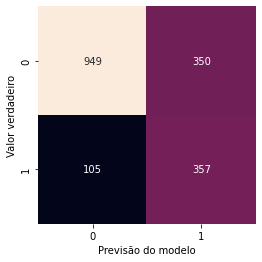

In [ ]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat, square=True, annot=True, cbar=False, fmt='g')
plt.xlabel('Previsão do modelo')
plt.ylabel('Valor verdadeiro');

# **5- Considerações finais**

O modelo final apresentou um *Recall rate* de 0.75 (macro avg), ou seja, foi capaz de categorizar corretamente 75% dos assinantes/usuários do serviço, o que pode ser considerado como um resultado positivo.

A partir desse momento teríamos duas abordagens:
1. Dividir uma lista com o time de marketing/comercial dos assinantes com maior probabilidade de evasão, habilitando os times a desenvolverem serviços e/ou promoções com intuíto de reverter uma possível movimentação do usuário.
2. Testar outros modelos com intuíto de otimizar a identificação de possíveis desistências (aumentando a performance do modelo).